In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Explore

In [33]:
load_time =pd.DataFrame({
                         "Jena-TDB":[4.31,9.57,189.05, 829.58],
                         "Virtuoso":[4.72 ,7.02, 165.01, 717.39]}).set_index(
    pd.Index(["0.25M","1M","25M","100M"]))
load_time


,Jena-TDB,Virtuoso
0.25M,4.31,4.72
1M,9.57,7.02
25M,189.05,165.01
100M,829.58,717.39


In [34]:
def label_point(x, y, val, ax ,col,siz):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if col == "red":
            ax.text(point['x'], point['y']+2, str(point['val']),color = col,ha="right",size = siz)
        else:
            ax.text(point['x'], point['y']+2, str(point['val']),color = col,ha="left",size = siz)

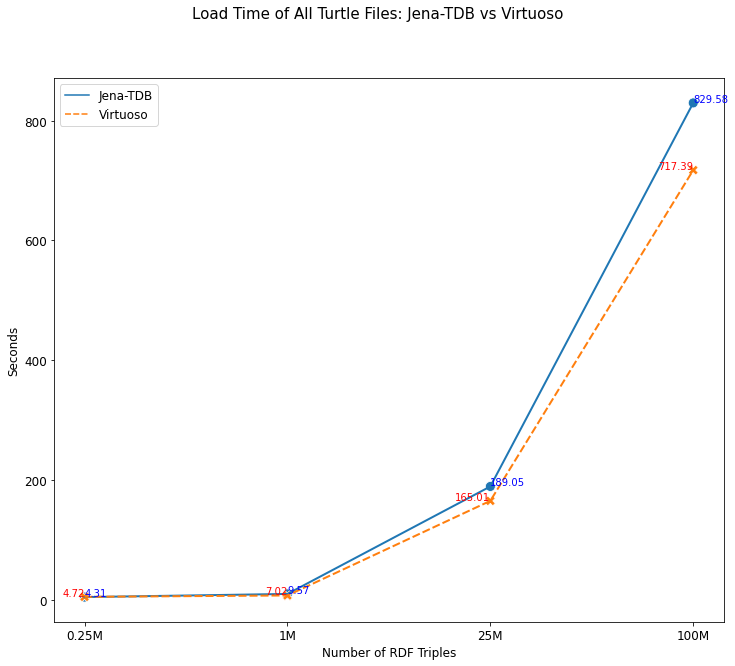

In [35]:
fig1,ax1 = plt.subplots(1,1,figsize = (12,10))
fig1.suptitle("Load Time of All Turtle Files: Jena-TDB vs Virtuoso",size = 15)

sns.scatterplot(data=load_time,ax=ax1,legend=False,s=100)
sns.lineplot(data = load_time,ax=ax1,linewidth = 2)
label_point(x=pd.Series(load_time.index),y=pd.Series(load_time["Jena-TDB"].values),
            val=pd.Series(load_time["Jena-TDB"].values),ax=ax1,col="blue",siz=10)

label_point(x=pd.Series(load_time.index),y=pd.Series(load_time["Virtuoso"].values),
            val=pd.Series(load_time["Virtuoso"].values),ax=ax1,col="red",siz=10)

ax1.set_xlabel("Number of RDF Triples",size = 12)
ax1.set_ylabel("Seconds",size = 12)
plt.legend(fontsize=12)

ax1.xaxis.set_tick_params(labelsize = 12)
ax1.yaxis.set_tick_params(labelsize = 12)

In [36]:
fig1.savefig("Load_Time.jpg", dpi=300)

## Client

In [37]:
client_1 =pd.DataFrame({
                         "Jena-TDB":[39158.48, 35843.60, 9546.32, 3411.99],
                         "Virtuoso":[23394.46, 23127.17, 15637.48, 14059.97]}).set_index(
    pd.Index(["0.25M","1M","25M","100M"]))
client_1

,Jena-TDB,Virtuoso
0.25M,39158.48,23394.46
1M,35843.60,23127.17
25M,9546.32,15637.48
100M,3411.99,14059.97


In [38]:
client_4 =pd.DataFrame({
                         "Jena-TDB":[118027.44, 106592.73, 26232.52, 10357.06],
                         "Virtuoso":[72380.22, 71883.57, 37048.79, 40742.27]}).set_index(
    pd.Index(["0.25M","1M","25M","100M"]))
client_4

,Jena-TDB,Virtuoso
0.25M,118027.44,72380.22
1M,106592.73,71883.57
25M,26232.52,37048.79
100M,10357.06,40742.27


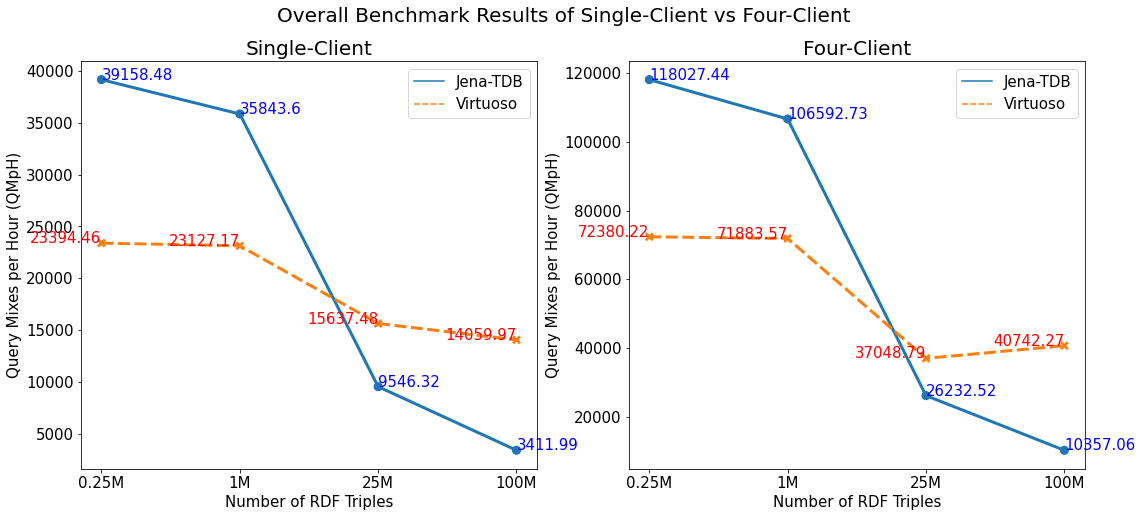

In [39]:
fig2,(ax2,ax3) = plt.subplots(1,2,figsize = (18 ,7.5))
fig2.suptitle("Overall Benchmark Results of Single-Client vs Four-Client ",size = 20)

sns.scatterplot(data=client_1,ax=ax2,legend=False,s=100)
sns.lineplot(data = client_1,ax=ax2,linewidth = 3)

label_point(x=pd.Series(client_1.index),y=pd.Series(client_1["Jena-TDB"].values),
            val=pd.Series(client_1["Jena-TDB"].values),ax=ax2,col="blue",siz=15)

label_point(x=pd.Series(client_1.index),y=pd.Series(client_1["Virtuoso"].values),
            val=pd.Series(client_1["Virtuoso"].values),ax=ax2,col="red",siz=15)

ax2.set_xlabel("Number of RDF Triples",size = 15)
ax2.set_ylabel("Query Mixes per Hour (QMpH)",size = 15)
ax2.legend(fontsize=15)
ax2.set_title("Single-Client",fontsize = 20)
ax2.xaxis.set_tick_params(labelsize = 15)
ax2.yaxis.set_tick_params(labelsize = 15)


sns.scatterplot(data=client_4,ax=ax3,legend=False,s=100)
sns.lineplot(data = client_4,ax=ax3,linewidth = 3)

label_point(x=pd.Series(client_4.index),y=pd.Series(client_4["Jena-TDB"].values),
            val=pd.Series(client_4["Jena-TDB"].values),ax=ax3,col="blue",siz=15)

label_point(x=pd.Series(client_4.index),y=pd.Series(client_4["Virtuoso"].values),
            val=pd.Series(client_4["Virtuoso"].values),ax=ax3,col="red",siz=15)

ax3.set_xlabel("Number of RDF Triples",size = 15)
ax3.set_ylabel("Query Mixes per Hour (QMpH)",size = 15)
ax3.legend(fontsize=15)
ax3.set_title("Four-Client",fontsize = 20)
ax3.xaxis.set_tick_params(labelsize = 15)
ax3.yaxis.set_tick_params(labelsize = 15)

In [40]:
fig2.savefig("Overall_Benchmark_Results.jpg",dpi = 300)

## queries

In [41]:
query_TDB = pd.DataFrame({"Q1":[269.84, 291.06, 286.99, 178.52],
    "Q2":[209.73, 211.40, 264.82, 193.00],
    "Q3":[322.63, 351.79, 291.37, 126.28],
    "Q4":[261.80, 303.64 ,213.62, 102.16],
    "Q5":[140.89, 98.00, 9.12, 3.58],
    "Q6":[None,None,None,None],
    "Q7":[278.03, 285.89 ,283.21 ,134.38],
    "Q8":[280.65, 285.76 ,317.43 ,150.86],
    "Q9":[622.90 ,432.99 ,52.62 ,12.96],
    "Q10":[343.44 ,300.23 ,375.52 ,271.14],
    "Q11":[396.43 ,408.23 ,455.58 ,311.11],
    "Q12":[449.40, 365.64,51.20 ,12.47]
                         }).set_index(
    pd.Index(["0.25M","1M","25M","100M"]))
query_TDB

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0.25M,269.84,209.73,322.63,261.80,140.89,None,278.03,280.65,622.90,343.44,396.43,449.40
1M,291.06,211.40,351.79,303.64,98.00,None,285.89,285.76,432.99,300.23,408.23,365.64
25M,286.99,264.82,291.37,213.62,9.12,None,283.21,317.43,52.62,375.52,455.58,51.20
100M,178.52,193.00,126.28,102.16,3.58,None,134.38,150.86,12.96,271.14,311.11,12.47


In [42]:
query_Virtuoso = pd.DataFrame({"Q1":[290.87, 284.96, 234.41 ,173.21],
                              "Q2":[115.61, 117.98, 98.38, 104.41],
                              "Q3":[252.48, 240.05, 203.69 ,153.58],
                              "Q4":[113.46, 105.75, 96.19, 72.85],
                              "Q5":[214.02, 196.89, 97.76, 45.23],
                              "Q6":[None,None,None,None],
                              "Q7":[140.97, 116.28, 59.49 ,67.31],
                              "Q8":[169.96, 150.10, 120.60 ,102.11],
                              "Q9":[448.36, 429.83 ,329.36 ,323.57],
                              "Q10":[100.91, 150.88 ,86.74 ,80.36],
                              "Q11":[500.80, 491.83, 229.33 ,153.85],
                              "Q12":[180.21, 192.40, 171.83 ,178.91],}).set_index(
    pd.Index(["0.25M","1M","25M","100M"]))
query_Virtuoso

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0.25M,290.87,115.61,252.48,113.46,214.02,None,140.97,169.96,448.36,100.91,500.80,180.21
1M,284.96,117.98,240.05,105.75,196.89,None,116.28,150.10,429.83,150.88,491.83,192.40
25M,234.41,98.38,203.69,96.19,97.76,None,59.49,120.60,329.36,86.74,229.33,171.83
100M,173.21,104.41,153.58,72.85,45.23,None,67.31,102.11,323.57,80.36,153.85,178.91


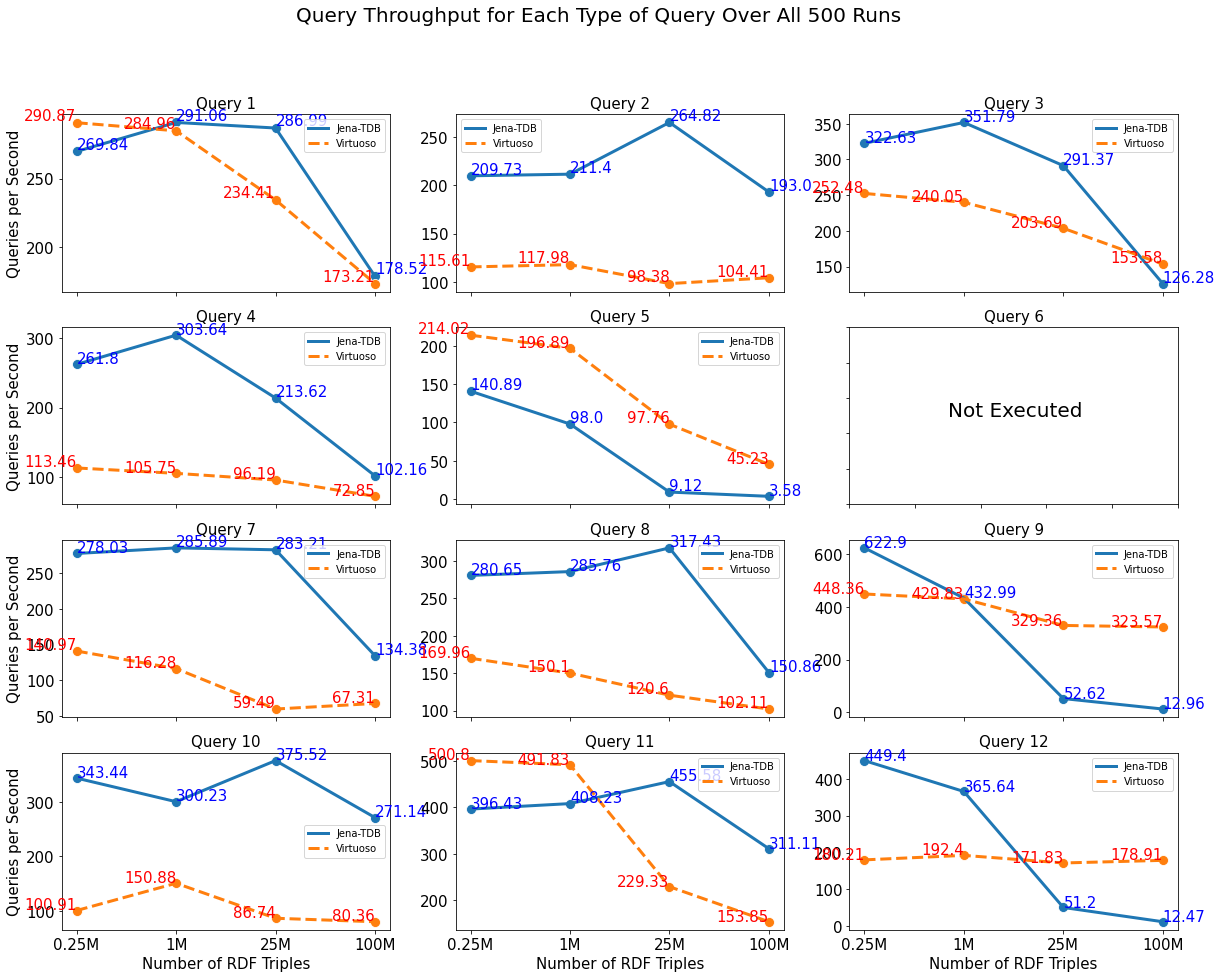

In [43]:
fig4,ax4_set = plt.subplots(4,3,figsize = (20 ,15))
fig4.suptitle("Query Throughput for Each Type of Query Over All 500 Runs ",size = 20)

for i, ax in enumerate(fig4.axes):
    
    ax.set_title("Query {}".format(i+1),fontsize = 15)
    ax.xaxis.set_tick_params(labelsize = 15)
    ax.yaxis.set_tick_params(labelsize = 15)
    
    if i == 5:
        ax.text(0.3,0.5,"Not Executed",size = 20)
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        continue
    else:
        sns.scatterplot(data=query_TDB.iloc[:,i],ax=ax,legend=False,s=100)
        sns.lineplot(data = query_TDB.iloc[:,i],ax=ax,linewidth = 3,label = "Jena-TDB")
    
        sns.scatterplot(data=query_Virtuoso.iloc[:,i],ax=ax,legend=False,s=100)
        sns.lineplot(data = query_Virtuoso.iloc[:,i],ax=ax,linewidth = 3,linestyle= "--",label = "Virtuoso")
    
        label_point(x=pd.Series(query_TDB.index),y=pd.Series(query_TDB.iloc[:,i].values),
            val=pd.Series(query_TDB.iloc[:,i].values),ax=ax,col="blue",siz=15)

        label_point(x=pd.Series(query_Virtuoso.index),y=pd.Series(query_Virtuoso.iloc[:,i].values),
            val=pd.Series(query_Virtuoso.iloc[:,i].values),ax=ax,col="red",siz=15)
        ax.legend()
        #ax.legend(handles=ax.lines[::len(query_Virtuoso)+1],labels = ["B"])
        if i in [9,10,11]:
            ax.set_xlabel("Number of RDF Triples",size = 15)
        else:
            ax.axes.xaxis.set_ticklabels([])
            
        if i in [0,3,6,9]:
            ax.set_ylabel("Queries per Second",size = 15)
        else:
            ax.set_ylabel("",size = 15)
            
            
            


In [44]:
fig4.savefig("Query_Throughput.jpg",dpi = 300)

# 2. Explore and Update

In [45]:
Q_TDB_2 = pd.DataFrame({"Upd. Q1":[8.49, 5.58, 3.01],
                        "Upd. Q2":[14.27, 6.81, 3.73],
                        "Exp. Q1":[416.41, 242.17 ,130.76],
                        "Exp. Q2":[309.07, 267.15 ,207.78],
                        "Exp. Q3":[483.30, 252.26 ,112.64],
                        "Exp. Q4":[457.84, 192.61 ,80.05],
                        "Exp. Q5":[141.00, 9.05, 3.43],
                        "Exp. Q6":[None,None,None],
                        "Exp. Q7":[384.38, 159.23 ,75.30],
                        "Exp. Q8":[418.04 ,238.80 ,113.68],
                        "Exp. Q9":[580.51, 53.63 ,12.81],
                        "Exp. Q10":[459.12 ,255.94 ,108.81],
                        "Exp. Q11":[619.51 ,462.41, 277.44],
                        "Exp. Q12":[417.58 ,52.09 ,12.61],}).set_index(
    pd.Index(["1M","25M","100M"]))
Q_TDB_2

,Upd. Q1,Upd. Q2,Exp. Q1,Exp. Q2,Exp. Q3,Exp. Q4,Exp. Q5,Exp. Q6,Exp. Q7,Exp. Q8,Exp. Q9,Exp. Q10,Exp. Q11,Exp. Q12
1M,8.49,14.27,416.41,309.07,483.30,457.84,141.00,None,384.38,418.04,580.51,459.12,619.51,417.58
25M,5.58,6.81,242.17,267.15,252.26,192.61,9.05,None,159.23,238.80,53.63,255.94,462.41,52.09
100M,3.01,3.73,130.76,207.78,112.64,80.05,3.43,None,75.30,113.68,12.81,108.81,277.44,12.61


In [46]:
Q_Virtuoso_2 = pd.DataFrame({"Upd. Q1":[25.50, 6.05, 5.36],
                        "Upd. Q2":[283.04 ,194.04, 48.61],
                        "Exp. Q1":[254.47 ,133.43, 49.32],
                        "Exp. Q2":[117.92 ,62.73 ,28.98],
                        "Exp. Q3":[226.14, 77.39 ,42.48],
                        "Exp. Q4":[95.79, 48.44, 37.97],
                        "Exp. Q5":[190.11, 31.95 ,10.84],
                        "Exp. Q6":[None,None,None],
                        "Exp. Q7":[127.20 ,30.92, 23.33],
                        "Exp. Q8":[152.88 ,80.39, 55.82],
                        "Exp. Q9":[409.97 ,217.84, 221.36],
                        "Exp. Q10":[117.76 ,85.16 ,66.61],
                        "Exp. Q11":[429.05 ,284.94, 186.42],
                        "Exp. Q12":[167.87 ,100.93 ,162.85],}).set_index(
    pd.Index(["1M","25M","100M"]))
Q_Virtuoso_2

,Upd. Q1,Upd. Q2,Exp. Q1,Exp. Q2,Exp. Q3,Exp. Q4,Exp. Q5,Exp. Q6,Exp. Q7,Exp. Q8,Exp. Q9,Exp. Q10,Exp. Q11,Exp. Q12
1M,25.50,283.04,254.47,117.92,226.14,95.79,190.11,None,127.20,152.88,409.97,117.76,429.05,167.87
25M,6.05,194.04,133.43,62.73,77.39,48.44,31.95,None,30.92,80.39,217.84,85.16,284.94,100.93
100M,5.36,48.61,49.32,28.98,42.48,37.97,10.84,None,23.33,55.82,221.36,66.61,186.42,162.85


In [48]:
list(Q_Virtuoso_2.columns)

['Upd. Q1',
 'Upd. Q2',
 'Exp. Q1',
 'Exp. Q2',
 'Exp. Q3',
 'Exp. Q4',
 'Exp. Q5',
 'Exp. Q6',
 'Exp. Q7',
 'Exp. Q8',
 'Exp. Q9',
 'Exp. Q10',
 'Exp. Q11',
 'Exp. Q12']

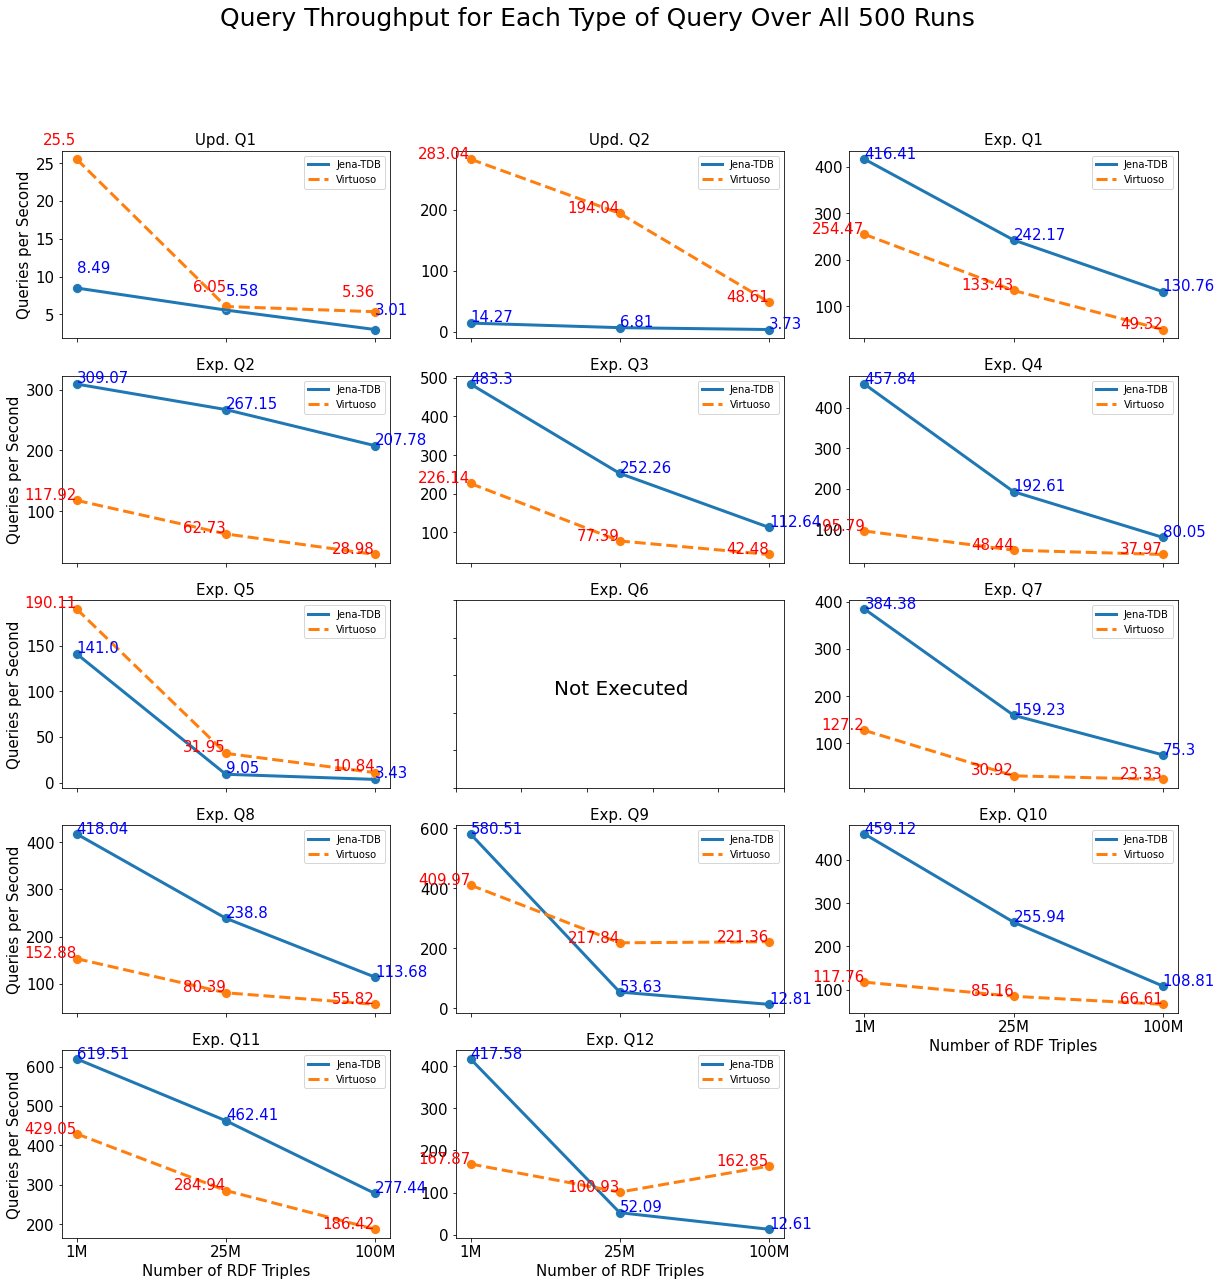

In [60]:
fig5,ax5_set = plt.subplots(5,3,figsize = (20 ,20))
fig5.suptitle("Query Throughput for Each Type of Query Over All 500 Runs ",size = 25)

for i, ax in enumerate(fig5.axes):
    
    if i == 14:
        ax.set_visible(False)
        break
    
    ax.set_title(list(Q_Virtuoso_2.columns)[i],fontsize = 15)
    ax.xaxis.set_tick_params(labelsize = 15)
    ax.yaxis.set_tick_params(labelsize = 15)
    
    if i == 7:
        ax.text(0.3,0.5,"Not Executed",size = 20)
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        continue
    else:
        sns.scatterplot(data=Q_TDB_2.iloc[:,i],ax=ax,legend=False,s=100)
        sns.lineplot(data = Q_TDB_2.iloc[:,i],ax=ax,linewidth = 3,label = "Jena-TDB")
    
        sns.scatterplot(data=Q_Virtuoso_2.iloc[:,i],ax=ax,legend=False,s=100)
        sns.lineplot(data = Q_Virtuoso_2.iloc[:,i],ax=ax,linewidth = 3,linestyle= "--",label = "Virtuoso")
    
        label_point(x=pd.Series(Q_TDB_2.index),y=pd.Series(Q_TDB_2.iloc[:,i].values),
            val=pd.Series(Q_TDB_2.iloc[:,i].values),ax=ax,col="blue",siz=15)

        label_point(x=pd.Series(Q_Virtuoso_2.index),y=pd.Series(Q_Virtuoso_2.iloc[:,i].values),
            val=pd.Series(Q_Virtuoso_2.iloc[:,i].values),ax=ax,col="red",siz=15)
        ax.legend()
        
        
        if i in [11,12,13]:
            ax.set_xlabel("Number of RDF Triples",size = 15)
        else:
            ax.axes.xaxis.set_ticklabels([])
            
        if i in [0,3,6,9,12]:
            ax.set_ylabel("Queries per Second",size = 15)
        else:
            ax.set_ylabel("",size = 15)
            

In [61]:
fig5.savefig("E_and_U_Query_Throughput.jpg",dpi = 300)

## Overall Benchmark

In [62]:
O_B_2 = pd.DataFrame({
                         "Jena-TDB":[6969.10 ,3019.06, 1388.22],
                         "Virtuoso":[14469.92 ,4768.68 ,3093.62]}).set_index(
    pd.Index(["1M","25M","100M"]))
O_B_2

,Jena-TDB,Virtuoso
1M,6969.10,14469.92
25M,3019.06,4768.68
100M,1388.22,3093.62


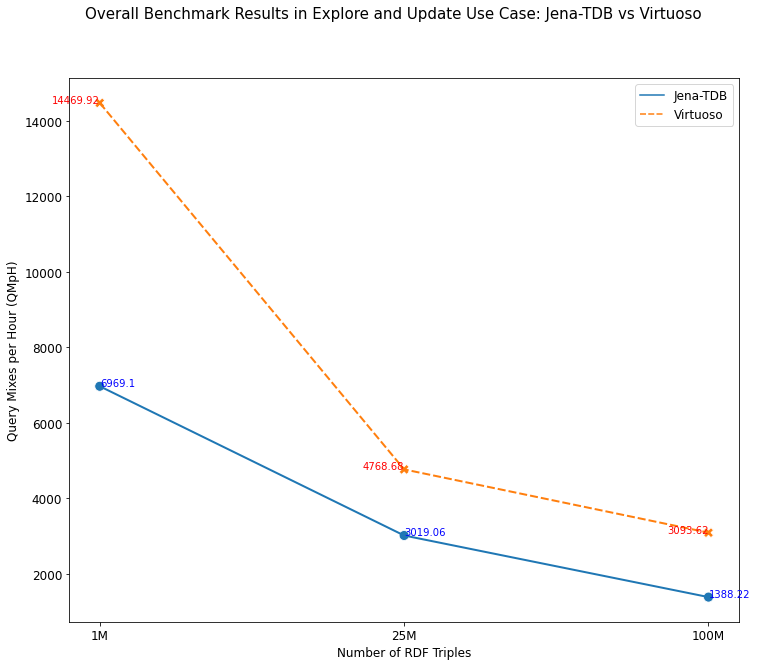

In [64]:
fig6,ax6 = plt.subplots(1,1,figsize = (12,10))
fig6.suptitle("Overall Benchmark Results in Explore and Update Use Case: Jena-TDB vs Virtuoso",size = 15)

sns.scatterplot(data=O_B_2,ax=ax6,legend=False,s=100)
sns.lineplot(data = O_B_2,ax=ax6,linewidth = 2)
label_point(x=pd.Series(O_B_2.index),y=pd.Series(O_B_2["Jena-TDB"].values),
            val=pd.Series(O_B_2["Jena-TDB"].values),ax=ax6,col="blue",siz=10)

label_point(x=pd.Series(O_B_2.index),y=pd.Series(O_B_2["Virtuoso"].values),
            val=pd.Series(O_B_2["Virtuoso"].values),ax=ax6,col="red",siz=10)

ax6.set_xlabel("Number of RDF Triples",size = 12)
ax6.set_ylabel("Query Mixes per Hour (QMpH)",size = 12)
plt.legend(fontsize=12)

ax6.xaxis.set_tick_params(labelsize = 12)
ax6.yaxis.set_tick_params(labelsize = 12)

In [66]:
fig6.savefig("E_and_U_Overall_Benchmark_Results.jpg",dpi = 300)

## 3. Business Intelligence

In [67]:
BI_TDB = pd.DataFrame({"Q1":[46.07, 12.36, 0.42 ,0.05],
                              "Q2":[5.90, 1.81, 0.06 ,0.02],
                              "Q3":[20.75, 5.07, 0.15, 0.02],
                              "Q4":[6.37, 3.79, 0.32 ,0.05],
                              "Q5":[49.85, 2.61 ,0.05 ,0.04],
                              "Q6":[42.73 ,50.33 ,23.33 ,5.51],
                              "Q7":[32.89, 26.84 ,0.22 ,0.08],
                              "Q8":[7.42, 2.09, 0.03, 0.23]}).set_index(
    pd.Index(["0.25M","1M","25M","100M"]))
BI_TDB

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0.25M,46.07,5.90,20.75,6.37,49.85,42.73,32.89,7.42
1M,12.36,1.81,5.07,3.79,2.61,50.33,26.84,2.09
25M,0.42,0.06,0.15,0.32,0.05,23.33,0.22,0.03
100M,0.05,0.02,0.02,0.05,0.04,5.51,0.08,0.23


In [68]:
BI_Virtuoso = pd.DataFrame({"Q1":[90.50, 74.93, 39.20 ,10.28],
                              "Q2":[247.40 ,230.25, 67.41, 18.95],
                              "Q3":[174.26 ,128.28 ,14.95, 2.26],
                              "Q4":[55.79, 42.72 ,16.67, 2.01],
                              "Q5":[106.48 ,78.10 ,16.11, 2.72],
                              "Q6":[1.60 ,19.67, 13.37, 2.93],
                              "Q7":[155.13 ,146.58, 75.44, 17.38],
                              "Q8":[30.54 ,14.15, 1.40, 1.31]}).set_index(
    pd.Index(["0.25M","1M","25M","100M"]))
BI_Virtuoso

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0.25M,90.50,247.40,174.26,55.79,106.48,1.60,155.13,30.54
1M,74.93,230.25,128.28,42.72,78.10,19.67,146.58,14.15
25M,39.20,67.41,14.95,16.67,16.11,13.37,75.44,1.40
100M,10.28,18.95,2.26,2.01,2.72,2.93,17.38,1.31


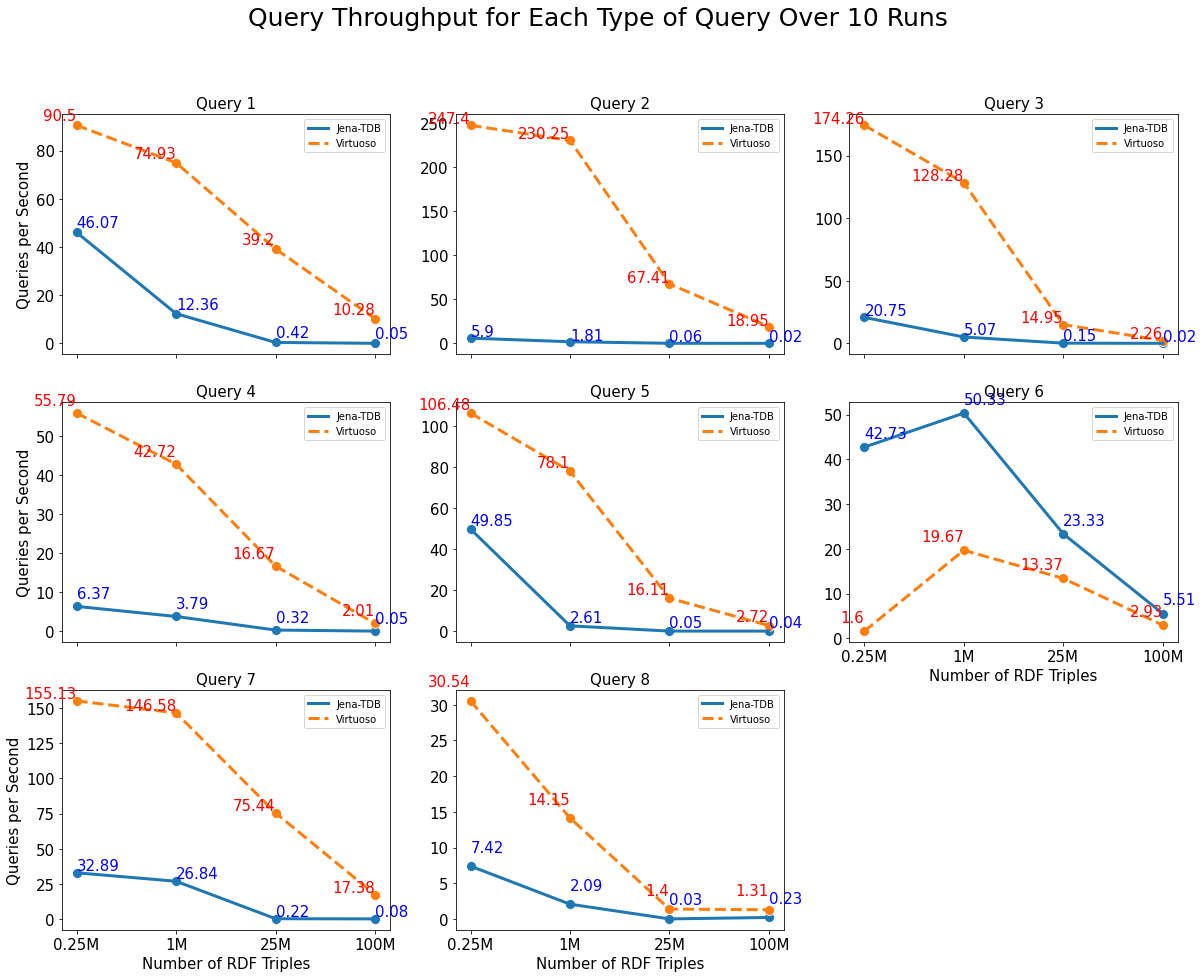

In [73]:
fig7,ax7_set = plt.subplots(3,3,figsize = (20 ,15))
fig7.suptitle("Query Throughput for Each Type of Query Over 10 Runs ",size = 25)

for i, ax in enumerate(fig7.axes):
    
    if i == 8:
        ax.set_visible(False)
        break
    
    ax.set_title("Query {}".format(i+1),fontsize = 15)
    ax.xaxis.set_tick_params(labelsize = 15)
    ax.yaxis.set_tick_params(labelsize = 15)
    

    sns.scatterplot(data=BI_TDB.iloc[:,i],ax=ax,legend=False,s=100)
    sns.lineplot(data = BI_TDB.iloc[:,i],ax=ax,linewidth = 3,label = "Jena-TDB")
    
    sns.scatterplot(data=BI_Virtuoso.iloc[:,i],ax=ax,legend=False,s=100)
    sns.lineplot(data = BI_Virtuoso.iloc[:,i],ax=ax,linewidth = 3,linestyle= "--",label = "Virtuoso")
    
    label_point(x=pd.Series(BI_TDB.index),y=pd.Series(BI_TDB.iloc[:,i].values),
            val=pd.Series(BI_TDB.iloc[:,i].values),ax=ax,col="blue",siz=15)

    label_point(x=pd.Series(BI_Virtuoso.index),y=pd.Series(BI_Virtuoso.iloc[:,i].values),
            val=pd.Series(BI_Virtuoso.iloc[:,i].values),ax=ax,col="red",siz=15)
    ax.legend()
        
        
    if i in [5,6,7]:
        ax.set_xlabel("Number of RDF Triples",size = 15)
    else:
        ax.axes.xaxis.set_ticklabels([])
            
    if i in [0,3,6]:
        ax.set_ylabel("Queries per Second",size = 15)
    else:
        ax.set_ylabel("",size = 15)

In [75]:
fig7.savefig("BI_Query_Throughput.jpg",dpi = 300)

## Overall Benchmark

In [76]:
O_B_3 = pd.DataFrame({
                         "Jena-TDB":[5951.15, 1787.15, 38.79, 19.14],
                         "Virtuoso":[5066.56, 18945.38, 3495.07, 1374.43]}).set_index(
    pd.Index(["0.25M","1M","25M","100M"]))
O_B_3

,Jena-TDB,Virtuoso
0.25M,5951.15,5066.56
1M,1787.15,18945.38
25M,38.79,3495.07
100M,19.14,1374.43


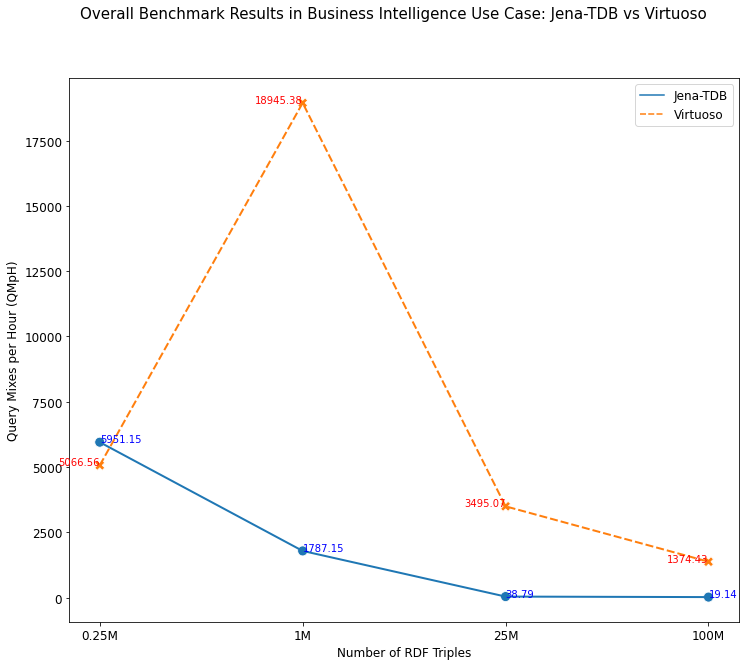

In [77]:
fig8,ax8 = plt.subplots(1,1,figsize = (12,10))
fig8.suptitle("Overall Benchmark Results in Business Intelligence Use Case: Jena-TDB vs Virtuoso",size = 15)

sns.scatterplot(data=O_B_3,ax=ax8,legend=False,s=100)
sns.lineplot(data = O_B_3,ax=ax8,linewidth = 2)
label_point(x=pd.Series(O_B_3.index),y=pd.Series(O_B_3["Jena-TDB"].values),
            val=pd.Series(O_B_3["Jena-TDB"].values),ax=ax8,col="blue",siz=10)

label_point(x=pd.Series(O_B_3.index),y=pd.Series(O_B_3["Virtuoso"].values),
            val=pd.Series(O_B_3["Virtuoso"].values),ax=ax8,col="red",siz=10)

ax8.set_xlabel("Number of RDF Triples",size = 12)
ax8.set_ylabel("Query Mixes per Hour (QMpH)",size = 12)
plt.legend(fontsize=12)

ax8.xaxis.set_tick_params(labelsize = 12)
ax8.yaxis.set_tick_params(labelsize = 12)

In [78]:
fig8.savefig("BI_Overall_Benchmark.jpg",dpi = 300)